# **Data Analysis**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**a. Import the dataset**

In [2]:
#Colab
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/Colab Notebooks')
df=pd.read_csv('Heart_disease.csv')

'''
#Jupyter Notebook
df=pd.read_csv('Heart_disease.csv')
'''

Mounted at /content/drive


"\n#Jupyter Notebook\ndf=pd.read_csv('Heart_disease.csv')\n"

In [3]:
print('shape:-',df.shape)
print(df)

shape:- (303, 14)
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1      

In [4]:
#info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


**No Null values**

In [5]:
#head
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [6]:
df.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
118,46,0,1,105,204,0,1,172,0,0.0,2,0,2,1
127,67,0,2,152,277,0,1,172,0,0.0,2,1,2,1
222,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
55,52,1,1,134,201,0,1,158,0,0.8,2,1,2,1
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
245,48,1,0,124,274,0,0,166,0,0.5,1,0,3,0
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
43,53,0,0,130,264,0,0,143,0,0.4,1,0,2,1


**b. Get information about the dataset (mean, max, min, quartiles etc.)**

In [7]:
#statistics
print(df.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

**c. Find the correlation between all fields**

In [8]:
correlation_matrix=df.corr()
print(correlation_matrix)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.03

# **Data Visualization:**

In [9]:
import seaborn as sns

**a. Visualize the number of patients having a heart disease
and not having a heart disease.**


In [12]:
target_count=df.target.value_counts()
print(target_count)
print("Percentage of patience without heart problems: "+str(round(target_count[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_count[1]*100/303,2)))

target
1    165
0    138
Name: count, dtype: int64
Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


<ipython-input-13-d2f43fbbf4db>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target',data=df,palette=['#1f77b4', '#ff7f0e'])


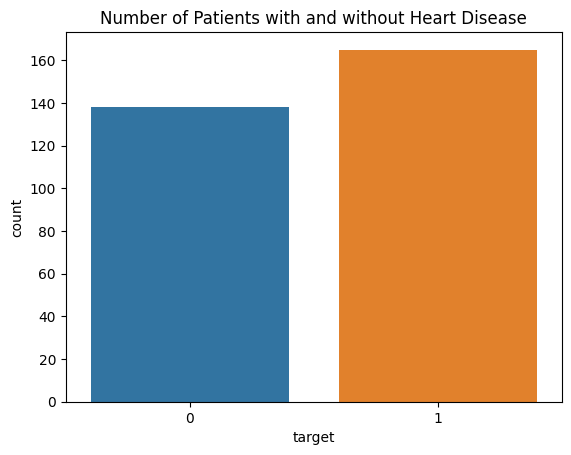

In [13]:
sns.countplot(x='target',data=df,palette=['#1f77b4', '#ff7f0e'])
plt.title('Number of Patients with and without Heart Disease')
plt.show()

**b. Visualize the age and whether a patient has disease or not.**

<ipython-input-14-ebd3455d7576>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='age', data=df,palette=['#2ca02c', '#d62728'])


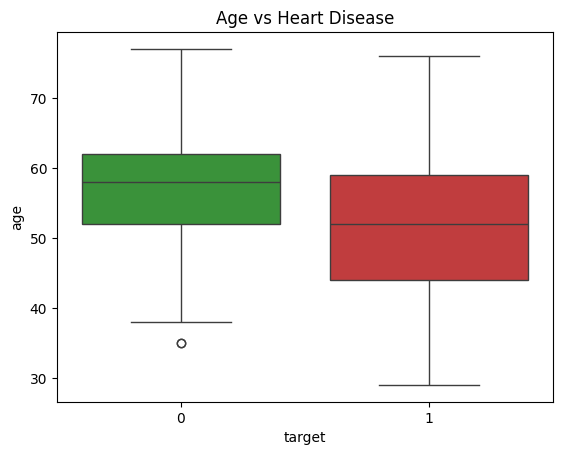

In [14]:
sns.boxplot(x='target', y='age', data=df,palette=['#2ca02c', '#d62728'])
plt.title('Age vs Heart Disease')
plt.show()

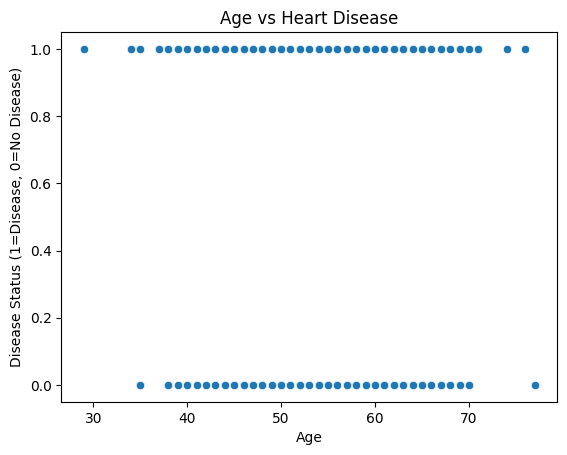

In [15]:
sns.scatterplot(x='age',y='target',data=df)
plt.title('Age vs Heart Disease')
plt.xlabel('Age')
plt.ylabel('Disease Status (1=Disease, 0=No Disease)')
plt.show()

 **c. Visualize correlation between all features using a heat map**

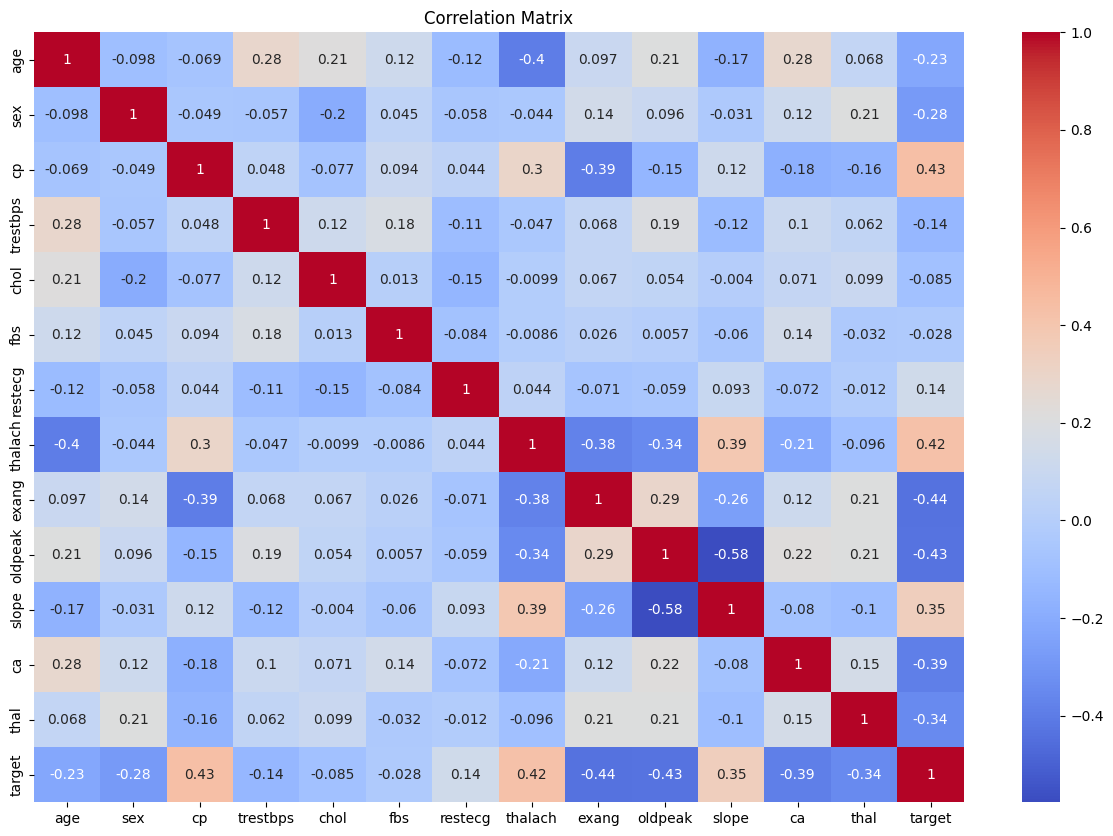

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Divide the dataset in 70:30 ratio**

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [18]:
y=df['target']
x=df.drop(columns='target')
#Divide the dataset in 70:30 ratio
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

# **Logistic Regression:**

**a. Build a simple logistic regression model:**

In [19]:
#Build the model on train set
logreg_model=LogisticRegression(max_iter=1000)
logreg_model.fit(x_train,y_train)
#predict the values on test
y_pred_log=logreg_model.predict(x_test)

**Build the confusion matrix and get the accuracy score**

In [20]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
conf_matrix_log=confusion_matrix(y_test,y_pred_log)
#calculating accuracy
accuracy_log=accuracy_score(y_test,y_pred_log)
print("Logistic Regression Confusion Matrix:\n", conf_matrix_log)
print("Logistic Regression Accuracy:", accuracy_log)
print("Classification Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Confusion Matrix:
 [[32 12]
 [ 5 42]]
Logistic Regression Accuracy: 0.8131868131868132
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.73      0.79        44
           1       0.78      0.89      0.83        47

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



# **Decision Tree**

In [21]:
from sklearn.tree import DecisionTreeClassifier

**a. Build a decision tree model:**

In [22]:
max_accuracy=0
for x in range(200):
    #Build the model on train set and predict the values on test set with various random states for better accuracy
    dt=DecisionTreeClassifier(random_state=x)
    dt.fit(x_train,y_train)
    y_pred_dt=dt.predict(x_test)
    current_accuracy=round(accuracy_score(y_pred_dt,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy=current_accuracy
        best_x=x

decision_tree=DecisionTreeClassifier(random_state=best_x)
#Build the model on train set
decision_tree.fit(x_train,y_train)
#predicting values
y_pred_dt=decision_tree.predict(x_test)

**Build the confusion matrix and get the accuracy score**

In [23]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
conf_matrix_dt=confusion_matrix(y_test,y_pred_dt)
#calculating accuracy
accuracy_dt=accuracy_score(y_test, y_pred_dt)
print("Decision Tree Confusion Matrix:\n", conf_matrix_dt)
print("Decision Tree Accuracy:", accuracy_dt)
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Confusion Matrix:
 [[33 11]
 [11 36]]
Decision Tree Accuracy: 0.7582417582417582
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75        44
           1       0.77      0.77      0.77        47

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.76      0.76      0.76        91



**Visualize the decision tree using the Graphviz package**

In [24]:
import graphviz
from sklearn import tree

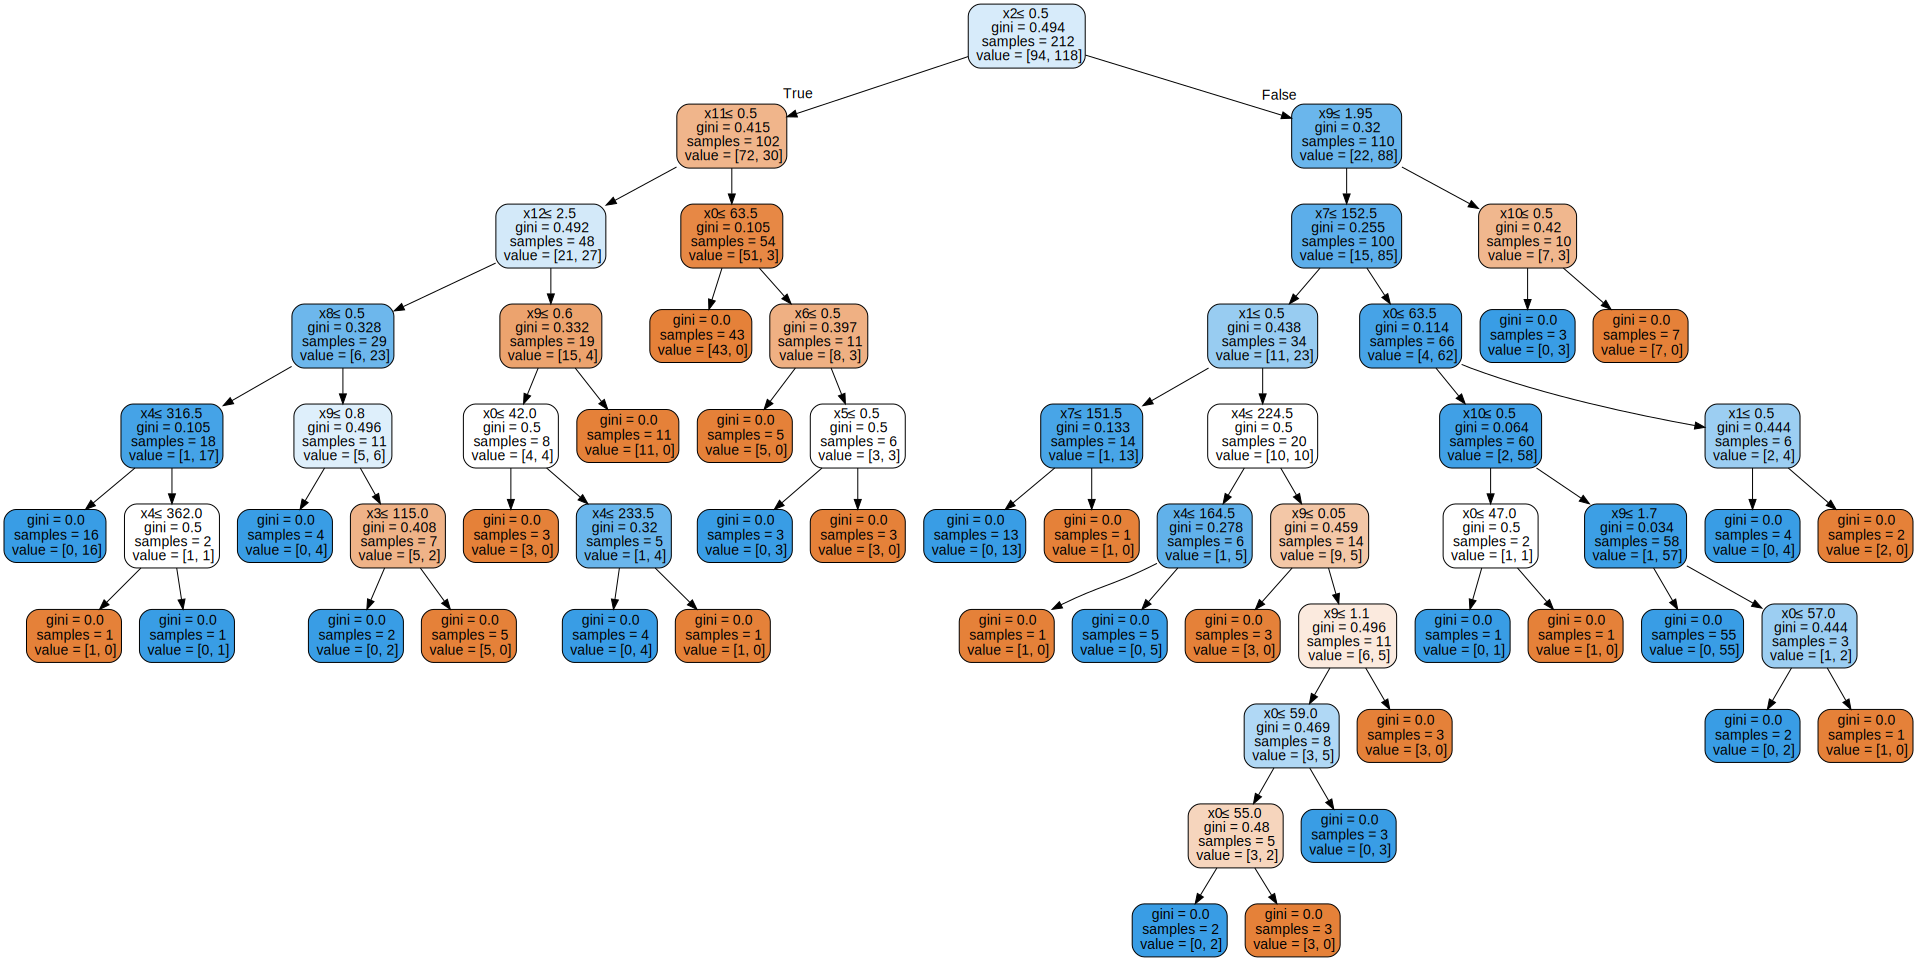

In [25]:
data=tree.export_graphviz(decision_tree, out_file=None,filled=True, rounded=True,special_characters=True)
graph=graphviz.Source(data)
graph

**5. Random Forest:**

# **Random Forest**

In [26]:
from sklearn.ensemble import RandomForestClassifier

**Build a Random Forest model:**

In [27]:
max_accuracy=0
for x in range(250):
    #Build the model on train set and predict the values on test set with various random states for better accuracy
    rf=RandomForestClassifier(random_state=x)
    rf.fit(x_train,y_train)
    y_pred_rf=rf.predict(x_test)
    current_accuracy=round(accuracy_score(y_pred_rf,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy=current_accuracy
        best_x=x

random_forest=RandomForestClassifier(random_state=best_x)
#Build the model on train set
random_forest.fit(x_train, y_train)
#predicting values
y_pred_rf=random_forest.predict(x_test)

**Build the confusion matrix and get the accuracy score**

In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
conf_matrix_rf=confusion_matrix(y_test,y_pred_rf)
#calculating accuracy
accuracy_rf=accuracy_score(y_test, y_pred_rf)
print("Random Forest Tree Confusion Matrix:\n", conf_matrix_rf)
print("Random Forest Tree Accuracy:", accuracy_rf)
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Tree Confusion Matrix:
 [[37  7]
 [ 4 43]]
Random Forest Tree Accuracy: 0.8791208791208791
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87        44
           1       0.86      0.91      0.89        47

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91



**Visualize the model using the Graphviz package**

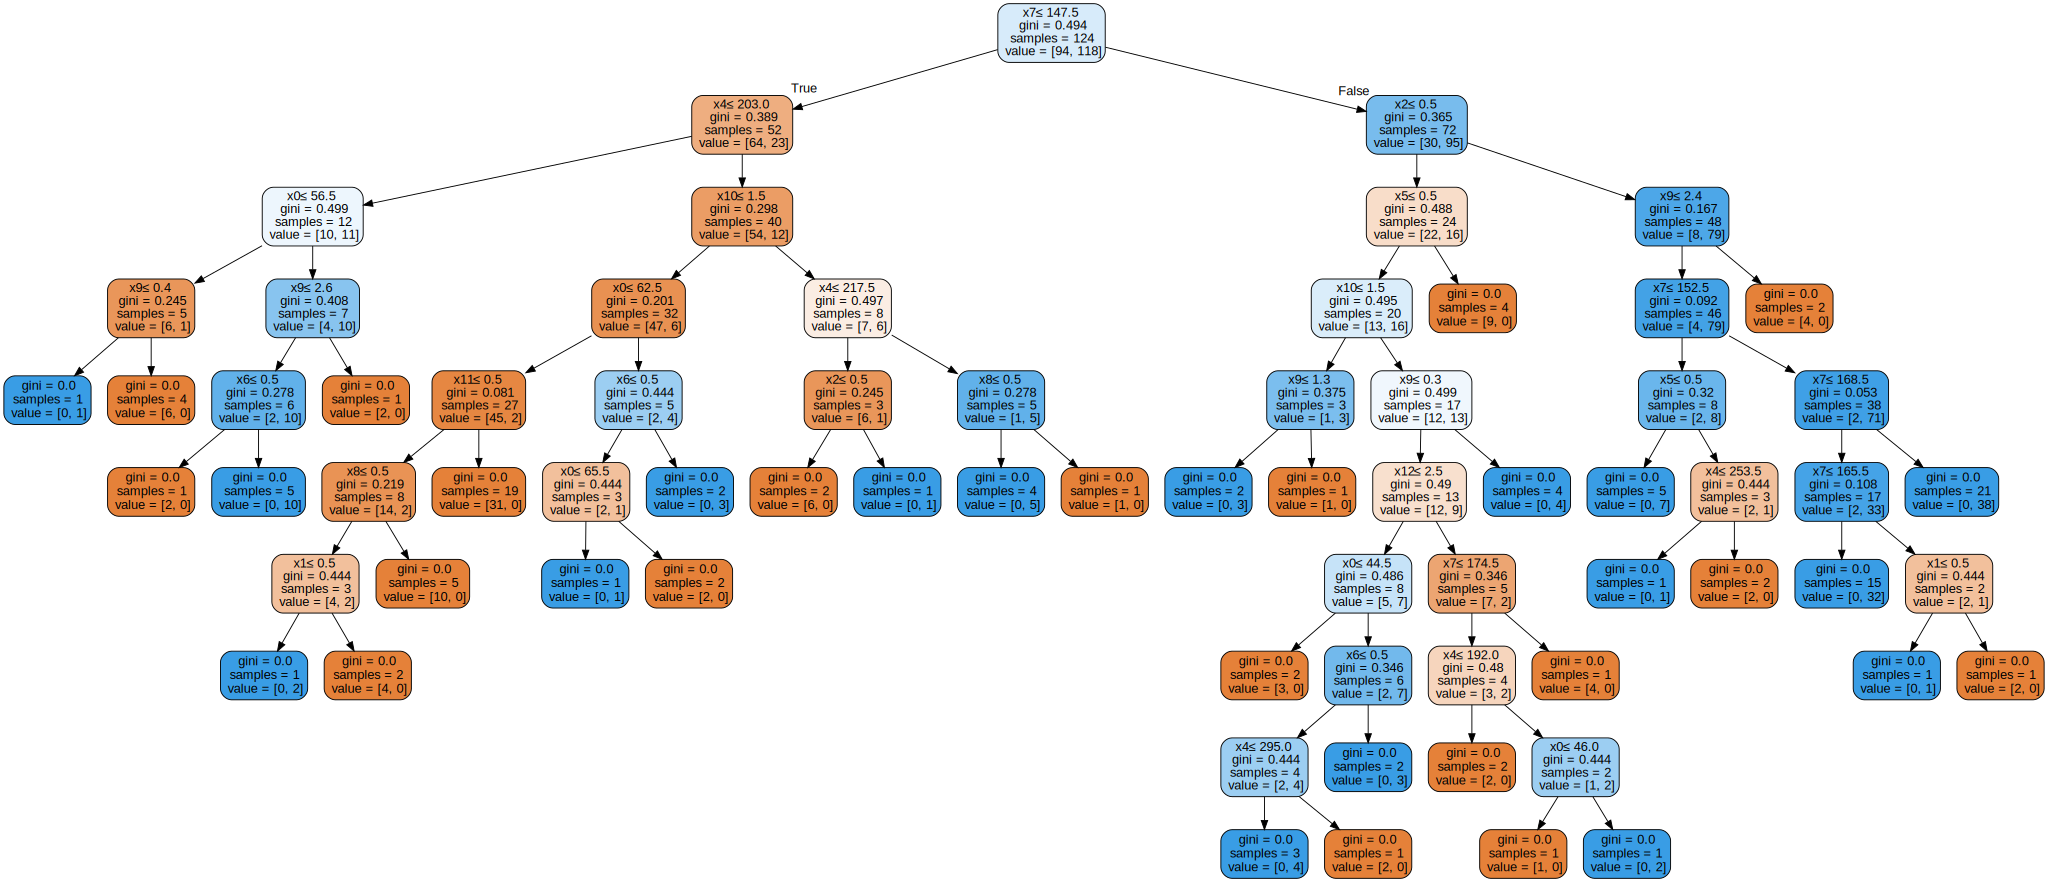

In [29]:
est=random_forest.estimators_[5]
data=tree.export_graphviz(est, out_file=None,filled=True, rounded=True,special_characters=True)
graph=graphviz.Source(data)
graph

# **Select the Best Model**

In [30]:
#a. Print the confusion matrix of all classifiers
print("Logistic Regression Confusion Matrix:\n", conf_matrix_log)
print("Decision Tree Confusion Matrix:\n", conf_matrix_dt)
print("Random Forest Confusion Matrix:\n", conf_matrix_rf)

Logistic Regression Confusion Matrix:
 [[32 12]
 [ 5 42]]
Decision Tree Confusion Matrix:
 [[33 11]
 [11 36]]
Random Forest Confusion Matrix:
 [[37  7]
 [ 4 43]]


In [31]:
#Print the classification report of all classifiers
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log))
print("Decision Tree Report:\n", classification_report(y_test, y_pred_dt))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.86      0.73      0.79        44
           1       0.78      0.89      0.83        47

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91

Decision Tree Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75        44
           1       0.77      0.77      0.77        47

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.76      0.76      0.76        91

Random Forest Report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87        44
           1       0.86      0.91      0.89        47

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91

In [32]:
# Accuracies of all classifiers
print("Logistic Regression Classifier : ",accuracy_log*100,"%")
print("Decision Tree Classifier : ", accuracy_dt*100,"%")
print("Random Forest Classifier : ",accuracy_rf*100,"%")

Logistic Regression Classifier :  81.31868131868131 %
Decision Tree Classifier :  75.82417582417582 %
Random Forest Classifier :  87.91208791208791 %


In [33]:
# Heatmaps of all the classifiers
def print_heatmap(matrix, score, figsize=(5,2)):
    plt.figure(figsize=figsize)
    sns.heatmap(matrix, annot=True,cmap='Blues_r')
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
    plt.title("Accuracy Score: {0}".format(score), size=15)

Heatmap of Logistic Regression Classifier


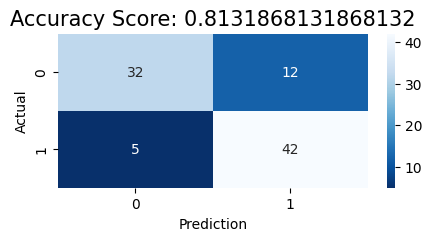

In [34]:
print("Heatmap of Logistic Regression Classifier")
print_heatmap(conf_matrix_log,accuracy_log)

Heatmap of Decision Tree Classifier


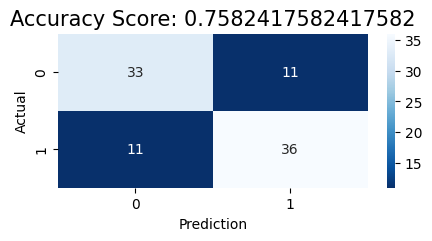

In [35]:
print("Heatmap of Decision Tree Classifier")
print_heatmap(conf_matrix_dt,accuracy_dt)

Heatmap of Random Forest Classifier


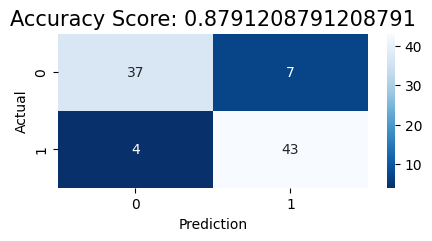

In [36]:
print("Heatmap of Random Forest Classifier")
print_heatmap(conf_matrix_rf,accuracy_rf)

In [37]:
# Precision, Recall and F1 Score of all the classifiers
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [38]:
# RECALLs
recall_log=recall_score(y_test,y_pred_log)
recall_dt=recall_score(y_test,y_pred_dt)
recall_rf=recall_score(y_test,y_pred_rf)
recalls=[]
recalls.append(recall_log)
recalls.append(recall_dt)
recalls.append(recall_rf)
recalls

[0.8936170212765957, 0.7659574468085106, 0.9148936170212766]

In [39]:
#PRECISIONS
pre_log=precision_score(y_test,y_pred_log)
pre_dt=precision_score(y_test,y_pred_dt)
pre_rf=precision_score(y_test,y_pred_rf)
precisions=[]
precisions.append(pre_log)
precisions.append(pre_dt)
precisions.append(pre_rf)
precisions

[0.7777777777777778, 0.7659574468085106, 0.86]

In [40]:
#F1-SCORES
f1_log=f1_score(y_test,y_pred_log)
f1_dt=f1_score(y_test,y_pred_dt)
f1_rf=f1_score(y_test,y_pred_rf)
f1_Score=[]
f1_Score.append(f1_log)
f1_Score.append(f1_dt)
f1_Score.append(f1_rf)
f1_Score

[0.8316831683168316, 0.7659574468085105, 0.8865979381443299]

**Select the best model based on the best accuracies**

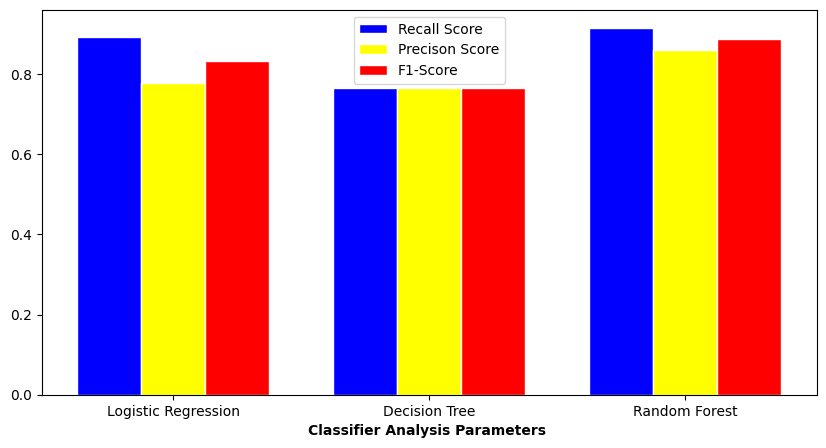

In [41]:
#Select the best model based on the best accuracies
plt.figure(figsize=(10,5))
barWidth=0.25
classifiers=["Logistic Regression","Decision Tree","Random Forest"]
c1=np.arange(len(recalls))
c2=[x + barWidth for x in c1]
c3=[x + barWidth for x in c2]
plt.bar(c1,recalls,color='blue',width=barWidth,edgecolor='white',label='Recall Score')
plt.bar(c2,precisions,color='yellow',width=barWidth,edgecolor='white',label='Precison Score')
plt.bar(c3,f1_Score,color='red',width=barWidth,edgecolor='white',label='F1-Score')
plt.xlabel('Classifier Analysis Parameters ',fontweight='bold')
plt.xticks([t + barWidth for t in range(len(recalls))], classifiers)
plt.legend()
plt.show()

**As the accuracy of the random forest classifier is better than the decison tree and the logistic regression hence for this example Random Forest is the Best Classifier**